Задание 1 Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу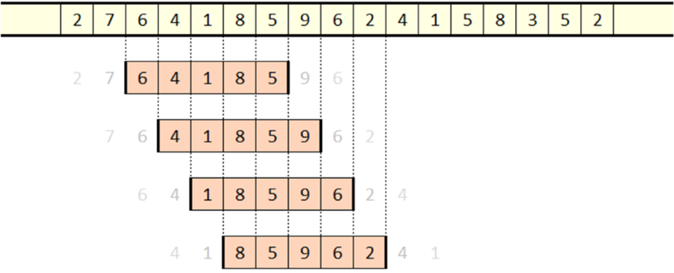

In [ ]:
import numpy as np


def sliding_window(x_array, w, step = 1):

    # Рассчитываем количество окон
    num_windows = (len(x_array) - w) // step + 1

    # Создаем пустую матрицу для хранения результатов
    A_matrix = np.empty((num_windows, w), dtype=x_array.dtype)

    # Заполняем матрицу скользящего среднего
    for i in range(num_windows):
        start = i * step
        end = start + w
        A_matrix[i] = x_array[start:end]

    return A_matrix

window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


Задание 2 В задании предлагается  ответить на несколько вопросов по данным репозитория UCI Adult (ссылка https://archive.ics.uci.edu/dataset/2/adult) (качать данные не надо – они уже есть в репозитории) и ответить на следующие вопросы:



In [ ]:

#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка набора данных
adult = fetch_ucirepo(id=2)

# Данные (как pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Объединение данных и целей в один DataFrame
df = pd.concat([X, y], axis=1)

# Просмотр метаданных
#print(adult.metadata)

# Информация о переменных
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

1.	сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [ ]:
# 1. Подсчет количества мужчин и женщин (признак 'sex')
sex_counts = df['sex'].value_counts()
print("Количество мужчин и женщин:")
print(sex_counts)

Количество мужчин и женщин:
sex
Male      32650
Female    16192
Name: count, dtype: int64


2.	каков средний возраст (признак age) женщин?

In [ ]:
mean_age_women = df[df['sex'] == 'Female']['age'].mean()
print("Средний возраст женщин:", mean_age_women)

Средний возраст женщин: 36.92798913043478


3.	какова доля граждан Германии (признак native-country)?

In [ ]:
german_citizens = df[df['native-country'] == 'Germany'].shape[0]
total_citizens = df.shape[0]
german_ratio = german_citizens / total_citizens
print("Доля граждан Германии:", german_ratio)

Доля граждан Германии: 0.00421768150362393


4.	Постройте гистограмму распределения (bar plot) образования людей (признак education).

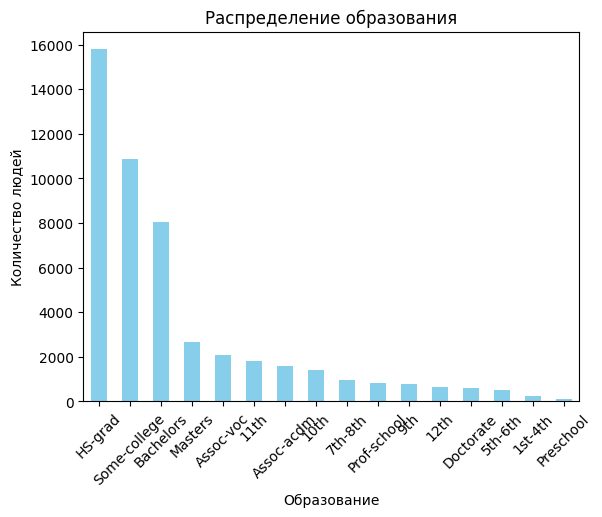

In [ ]:
df['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение образования')
plt.xlabel('Образование')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.show()

5.	каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [ ]:
less_50k = df[df['income'] == '<=50K']['age']
mean_age_less_50k = less_50k.mean()
std_age_less_50k = less_50k.std()
print("Средний возраст тех, кто зарабатывает <=50K:", mean_age_less_50k)
print("Среднеквадратичное отклонение возраста тех, кто зарабатывает <=50K:", std_age_less_50k)

Средний возраст тех, кто зарабатывает <=50K: 36.78373786407767
Среднеквадратичное отклонение возраста тех, кто зарабатывает <=50K: 14.02008849082488


6.	правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
higher_earners = df[df['income'] == '>50K']
all_have_higher_ed = higher_earners['education'].isin(higher_education).all()
print("Правда ли, что все люди, зарабатывающие >50K, имеют высшее образование?", all_have_higher_ed)

Правда ли, что все люди, зарабатывающие >50K, имеют высшее образование? False


7.	выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Каков максимальный возраст мужчин расы Amer-Indian-Eskimo?

In [ ]:
race_sex_stats = df.groupby(['race', 'sex'])['age'].describe()
print(race_sex_stats)
max_age_amerindian_men = df[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male')]['age'].max()
print("Максимальный возраст мужчин расы Amer-Indian-Eskimo:", max_age_amerindian_men)

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    185.0  36.237838  12.840056  17.0  26.0  35.0   
                   Male      285.0  36.989474  11.703943  17.0  29.0  35.0   
Asian-Pac-Islander Female    517.0  35.657640  12.637799  17.0  25.0  34.0   
                   Male     1002.0  38.994012  12.824878  18.0  29.0  37.0   
Black              Female   2308.0  37.905979  12.736001  17.0  28.0  36.0   
                   Male     2377.0  37.922592  13.036981  17.0  28.0  36.0   
Other              Female    155.0  31.212903  11.233061  17.0  23.0  29.0   
                   Male      251.0  35.167331  11.808297  17.0  26.0  32.0   
White              Female  13027.0  36.882935  14.454178  17.0  25.0  35.0   
                   Male    28735.0  39.704507  13.475250  17.0  29.0  38.0   

                            75%   max  
race               sex 

8.	среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми

In [ ]:
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
married_men = df[(df['sex'] == 'Male') & (df['marital-status'].isin(married_statuses))]
single_men = df[(df['sex'] == 'Male') & (~df['marital-status'].isin(married_statuses))]
married_high_earners_ratio = married_men[married_men['income'] == '>50K'].shape[0] / married_men.shape[0]
single_high_earners_ratio = single_men[single_men['income'] == '>50K'].shape[0] / single_men.shape[0]
print("Доля зарабатывающих >50K среди женатых мужчин:", married_high_earners_ratio)
print("Доля зарабатывающих >50K среди холостых мужчин:", single_high_earners_ratio)

Доля зарабатывающих >50K среди женатых мужчин: 0.29478626142821845
Доля зарабатывающих >50K среди холостых мужчин: 0.056141763995167134


9.	какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [ ]:
max_hours_per_week = df['hours-per-week'].max()
people_working_max_hours = df[df['hours-per-week'] == max_hours_per_week].shape[0]
high_earners_working_max_hours = df[(df['hours-per-week'] == max_hours_per_week) & (df['income'] == '>50K')].shape[0]
high_earners_ratio = high_earners_working_max_hours / people_working_max_hours
print("Максимальное количество часов в неделю:", max_hours_per_week)
print("Количество людей, работающих максимальное количество часов:", people_working_max_hours)
print("Процент зарабатывающих более 50K среди них:", high_earners_ratio * 100, "%")

Максимальное количество часов в неделю: 99
Количество людей, работающих максимальное количество часов: 137
Процент зарабатывающих более 50K среди них: 18.248175182481752 %


10.	посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country)

In [ ]:
avg_hours_per_country_salary = df.groupby(['native-country', 'income'])['hours-per-week'].mean().unstack()
print(avg_hours_per_country_salary)

income                          <=50K     <=50K.       >50K      >50K.
native-country                                                        
?                           40.164760        NaN  45.547945        NaN
Cambodia                    41.416667  40.714286  40.000000  57.500000
Canada                      37.914634  36.189189  45.641026  46.916667
China                       37.381818  35.451613  38.900000  45.937500
Columbia                    38.684211  40.166667  50.000000  62.500000
Cuba                        37.985714  41.705882  42.440000  44.000000
Dominican-Republic          42.338235  39.800000  47.000000  40.000000
Ecuador                     38.041667  37.800000  48.750000  46.000000
El-Salvador                 36.030928  35.382979  45.000000  36.500000
England                     40.483333  36.050000  44.533333  49.411765
France                      41.058824  36.800000  50.750000  33.750000
Germany                     39.139785  38.490909  44.977273  48.000000
Greece

Задание 3. На основе выбранного вами датасета провести его анализ по минимум 10 признакам. Датасет можно выбрать с данного сайта https://www.kaggle.com

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())

Saving cars_info.csv to cars_info.csv
         ID                                               Name   Price  \
0  11530130                  2010 Toyota Rukus Build 2 AZE151R    9999   
1  12190570  2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...  117990   
2  12321855  2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...   79990   
3  12346971         2010 Mercedes-Benz E250 CDI Avantgarde 207   34990   
4  12363884                       2016 Holden Cruze CD JH MY16   15990   

           Brand    Model               Variant    Series  Year  Kilometers  \
0         Toyota    Rukus               Build 2   AZE151R  2010      263000   
1  Mercedes-Benz        V  250 D Avantgarde MWB  447 MY21  2021          19   
2  Mercedes-Benz  Valente       116 CDI MWB RWD  447 MY21  2021          24   
3  Mercedes-Benz     E250        CDI Avantgarde       207  2010      120579   
4         Holden    Cruze                    CD   JH MY16  2016       72506   

          Type    Gearbox             Fuel

1. Подсчитать Сколько всего автомобилей продается под всеми брэндами

In [ ]:
brands_count = df['Brand'].value_counts()
print("всего автомобилей продается под брэндом toyota:", brands_count)

всего автомобилей продается под брэндом toyota: Brand
Toyota             2768
Holden             1505
Ford               1490
Mazda              1167
Hyundai            1087
Mitsubishi         1074
Volkswagen         1019
Nissan             1008
Kia                 744
Subaru              655
Mercedes-Benz       625
Audi                518
BMW                 480
Honda               413
Jeep                379
Land Rover          273
Isuzu               267
Lexus               180
Volvo               161
Skoda               160
Suzuki              160
Renault             158
LDV                 122
MG                   97
Porsche              91
Mini                 66
Peugeot              45
Chrysler             42
Jaguar               38
HSV                  37
GWM                  29
Great Wall           27
Ram                  23
Fiat                 17
Dodge                14
Citroen              13
Alfa Romeo           11
Ssangyong            11
Infiniti              9
Maserati  

2. Средняя цена продажи автомобилей

In [ ]:
average_price = df['Price'].mean()
print("Средняя цена продажи автомобилей:", average_price)

Средняя цена продажи автомобилей: 36777.778038479584


3. Медианная цена по типу топлива

In [ ]:
med_price_by_fuel = df.groupby('Fuel')['Price'].median()
print("Медианная цена по типу топлива:", med_price_by_fuel)

Медианная цена по типу топлива: Fuel
Diesel                        38990.0
Diesel/Electric              113894.0
Liquid Petroleum Gas          13994.5
Premium Unleaded Petrol       36331.5
Premium Unleaded/Electric     73890.0
Unleaded Petrol               22887.0
Unleaded Petrol/Electric      43990.0
Name: Price, dtype: float64


4. Корреляция между пробегом и возрастом автомобиля

In [ ]:
df['Age'] = 2024 - df['Year']
corr = df[['Kilometers', 'Age']].corr().iloc[0, 1]
print("Корреляция между пробегом и возрастом автомобиля:", corr)

Корреляция между пробегом и возрастом автомобиля: 0.7285147324372001


5. Топ 5 дорогих моделей каждой марки

In [ ]:
topp = df.groupby('Brand').apply(lambda x: x.nlargest(5, 'Price'))
print("Топ 5 наиболее дорогих моделей по маркам:")
print(topp[['Brand', 'Model', 'Price']])

Топ 5 наиболее дорогих моделей по маркам:
               Brand Model   Price
Brand                             
Abarth 7984   Abarth   595   39500
       1860   Abarth   595   38990
       3009   Abarth   124   37990
       13736  Abarth   595   36999
       7961   Abarth   595   33990
...              ...   ...     ...
Volvo  2799    Volvo  XC90  129900
       4867    Volvo  XC90  119888
       371     Volvo  XC90  113990
       14995   Volvo  XC90  112990
       2652    Volvo  XC60  111990

[251 rows x 3 columns]


6. Соотношение цены к пробегу

In [ ]:
df['Price_to_Kilometers_Ratio'] = df['Price'] / df['Kilometers']
soot = df.groupby('Brand')['Price_to_Kilometers_Ratio'].mean()
print("Соотношение цены к пробегу по маркам:", soot)

Соотношение цены к пробегу по маркам: Brand
Abarth                4.371289
Alfa Romeo            1.969795
Aston Martin          8.290126
Audi                 23.036530
BMW                   5.884525
Bentley              14.638500
Chery                 0.171441
Chevrolet             6.946788
Chrysler              1.288348
Citroen             434.924012
Cupra                34.341978
Dodge                 0.102839
FPV                   1.531395
Fiat                  0.351295
Ford                 22.912193
Foton                 0.157192
GWM                2376.424872
Genesis               3.678458
Great Wall            0.202410
HSV                   2.087090
Haval                 1.769478
Hino                  0.509868
Holden                0.345378
Honda                 3.578457
Hyundai              58.868717
Infiniti              0.448684
Isuzu               149.784696
Iveco                 0.508449
Jaguar                2.232728
Jeep                428.722582
Kia                  12.49

7. Индекс топливной эффективности

In [ ]:
srr_pr = df.groupby('Fuel')['Kilometers'].mean()
srr_m = df.groupby('Fuel')['CC'].mean()
ind = srr_pr / srr_m
print("Индекс топливной эффективности по типу топлива:", ind)

Индекс топливной эффективности по типу топлива: Fuel
Diesel                       44.434310
Diesel/Electric               8.578080
Liquid Petroleum Gas         57.355171
Premium Unleaded Petrol      30.910786
Premium Unleaded/Electric    12.051922
Unleaded Petrol              45.360658
Unleaded Petrol/Electric     20.684570
dtype: float64


8. График средней цены по годам

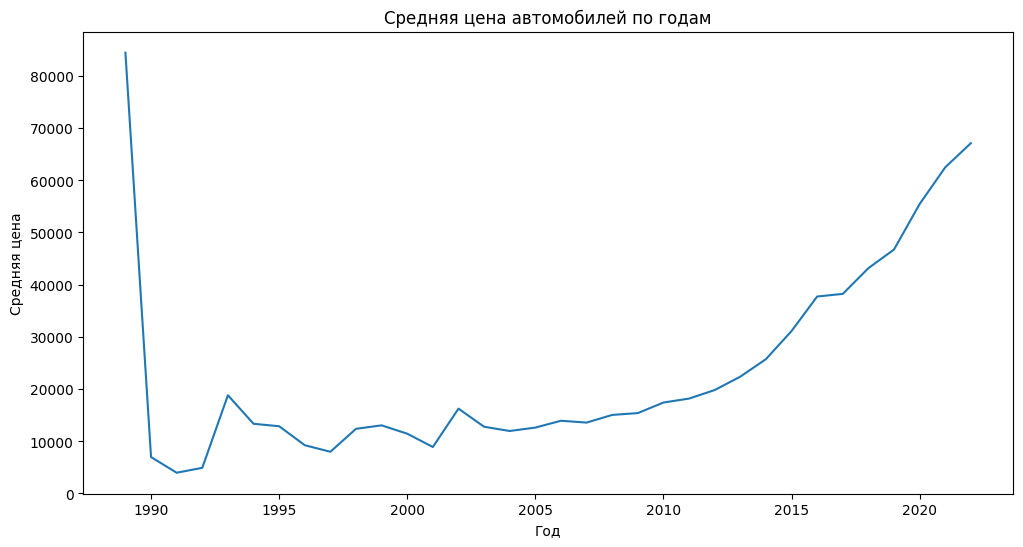

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Price'].mean().reset_index(), x='Year', y='Price')
plt.title('Средняя цена автомобилей по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

9. Тренды по приводу

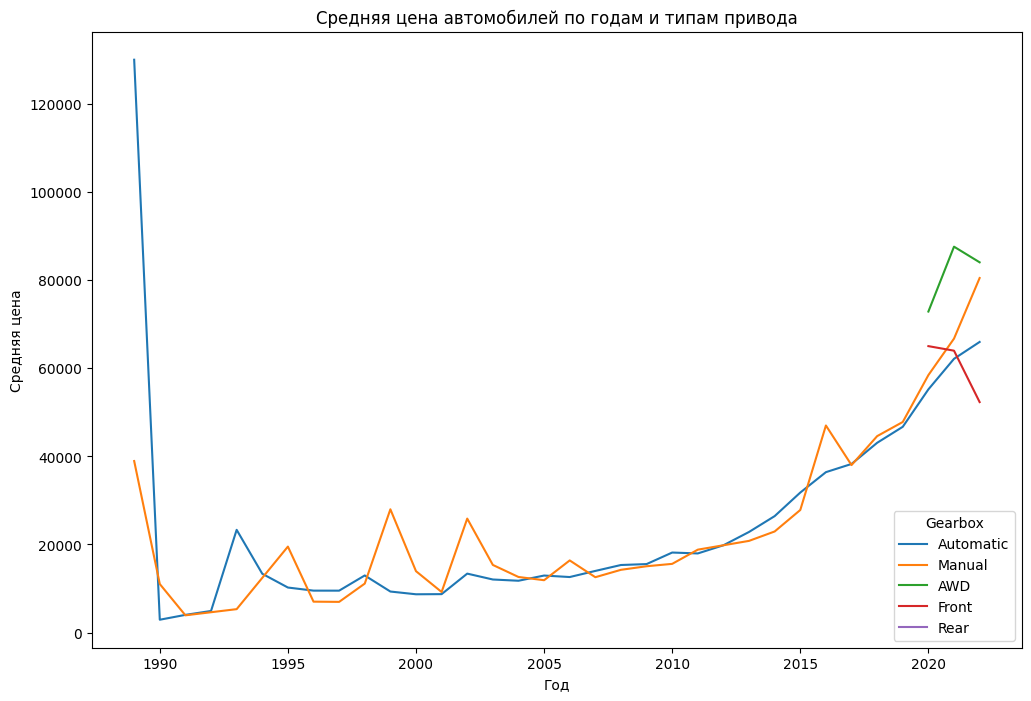

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df.groupby(['Year', 'Gearbox'])['Price'].mean().reset_index(), x='Year', y='Price', hue='Gearbox')
plt.title('Средняя цена автомобилей по годам и типам привода')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

10. Распределение возраста автомобилей по состоянию

In [ ]:
df['Age'] = 2024 - df['Year']
rasp = df.groupby('Status')['Age'].describe()
print(rasp)

                 count      mean       std  min  25%  50%   75%   max
Status                                                               
 Demo            387.0  2.136951  0.373131  2.0  2.0  2.0   2.0   4.0
 New In Stock    357.0  2.358543  2.023809  2.0  2.0  2.0   2.0  19.0
 Used          16304.0  8.805079  4.619341  2.0  6.0  8.0  11.0  35.0
